### Importando as libs

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import models

import matplotlib.pyplot as plt

### Baixando dados

In [20]:
# Definindo transformações para o conjunto de dados
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]) # esse trecho foi pego na net

# Carregando e preparando os dados CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)
# esse trecho foi pego na net

Files already downloaded and verified
Files already downloaded and verified


### criando a cnn

In [21]:
# Definindo a CNN personalizada
class Minha_cnn(nn.Module):
    def __init__(self):
        super(Minha_cnn, self).__init__()
        self.cv1 = nn.Conv2d(3, 16, 3, padding=1) # Entrada de 3 canais saida de 16
        self.cv2 = nn.Conv2d(16, 32, 3, padding=1) # Entrada de 16 canais saida de 32
        self.pool1 = nn.MaxPool2d(2, 2) # MaxPoo
        self.cv3 = nn.Conv2d(32, 64, 3, padding=1) # Entrada de 32 canais saida de 64
        self.pool2 = nn.MaxPool2d(2, 2) # MaxPoo
        self.fc1 = nn.Linear(64 * 4 * 4, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.cv1(x)))
        x = self.pool1(torch.relu(self.cv2(x)))
        x = self.pool2(torch.relu(self.cv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = self.fc1(x)
        return x

custom_model = Minha_cnn() # Instanciando a CNN customizada

criterion = nn.CrossEntropyLoss() # Recomendada para esse caso(Net)
optimizer_custom = optim.SGD(custom_model.parameters(), lr=0.01) # lr de 0.01 por outros projetos (me pareceu a melhor em varios casos)

### Treinando a CNN

In [22]:
valores_graficos = []

epochs = 20
for epoch in range(epochs):
    running_loss = 0.0  # Variável para acompanhar a perda
    for i, data in enumerate(trainloader, 0):  # Conjunto de treinamento
        inputs, labels = data  # Inputs e rótulos do batch atual
        optimizer_custom.zero_grad()
        outputs = custom_model(inputs)
        loss = criterion(outputs, labels)  # Calcula a perda entre as previsões e os rótulos reais
        loss.backward()  # Retropropagação para calcular os gradientes
        optimizer_custom.step()  # Atualiza os pesos
        running_loss += loss.item()  # Acumula a perda do batch atual
    
    # Calcula a perda média da época e armazena na lista
    epoch_loss = running_loss / len(trainloader)
    valores_graficos.append(epoch_loss)

    print(f'Epoch [{epoch + 1}/{epochs}] Loss: {epoch_loss:.5f}')



Epoch [1/20] Loss: 2.24335
Epoch [2/20] Loss: 1.94968
Epoch [3/20] Loss: 1.78208
Epoch [4/20] Loss: 1.65334
Epoch [5/20] Loss: 1.54803
Epoch [6/20] Loss: 1.48115
Epoch [7/20] Loss: 1.43731
Epoch [8/20] Loss: 1.39657
Epoch [9/20] Loss: 1.36192
Epoch [10/20] Loss: 1.32944
Epoch [11/20] Loss: 1.29745
Epoch [12/20] Loss: 1.26922
Epoch [13/20] Loss: 1.24120
Epoch [14/20] Loss: 1.21407
Epoch [15/20] Loss: 1.18801
Epoch [16/20] Loss: 1.16501
Epoch [17/20] Loss: 1.14367
Epoch [18/20] Loss: 1.12134
Epoch [19/20] Loss: 1.10309
Epoch [20/20] Loss: 1.07933


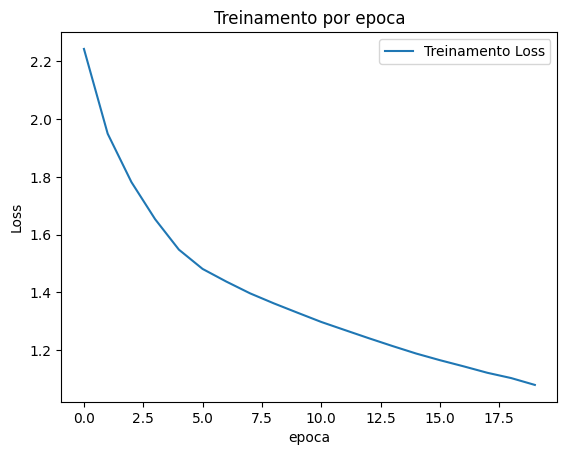

Treinamento da CNN personalizada concluído


In [23]:
# Plot da curva de perda
plt.plot(valores_graficos, label='Treinamento Loss')
plt.title('Treinamento por epoca')
plt.xlabel('epoca')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Treinamento da CNN personalizada concluído')

### criando a Resnet-18

In [24]:
resnet_model = models.resnet18(pretrained=True) # carregando essa lindeza

# Substituindo a camada FC para ajustar à saída da CIFAR-10
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 10)

# Definindo a função de perda e o otimizador para a transfer learning
optimizer_resnet = optim.SGD(resnet_model.fc.parameters(), lr=0.01, momentum=0.9) # lr=0.01 denovo

c:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Treinando a resnet18

In [25]:
valores_graficos = []

epochs = 1
for epoch in range(epochs):
    running_loss = 0.0  # Variável para acompanhar a perda
    for i, data in enumerate(trainloader, 0):  # Conjunto de treinamento
        inputs, labels = data  # Inputs e rótulos do batch atual
        optimizer_resnet.zero_grad()
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)  # Calcula a perda entre as previsões e os rótulos reais
        loss.backward()  # Retropropagação para calcular os gradientes
        optimizer_resnet.step()  # Atualiza os pesos
        running_loss += loss.item()  # Acumula a perda do batch atual
    
    # Calcula a perda média da época e armazena na lista
    epoch_loss = running_loss / len(trainloader)
    valores_graficos.append(epoch_loss)

    print(f'Epoch [{epoch + 1}/{epochs}] Loss: {epoch_loss:.5f}')


Epoch [1/1] Loss: 1.77348


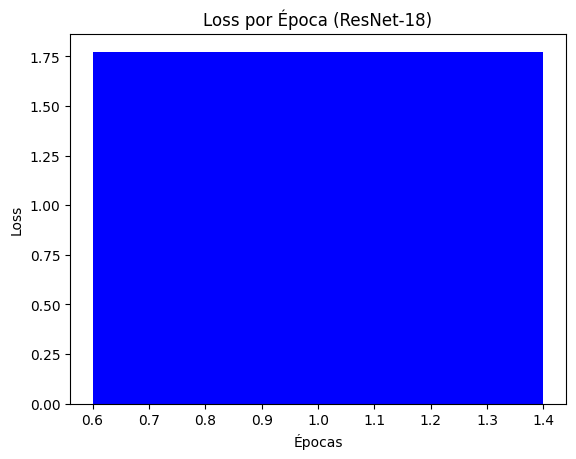

Treinamento da ResNet-18 concluído


In [28]:
epochs = range(1, len(valores_graficos) + 1)  # Números de épocas para o eixo x
plt.bar(epochs, valores_graficos, color='blue')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss por Época (ResNet-18)')
plt.show()

print('Treinamento da ResNet-18 concluído')

### testando a saida

Acurácia da CNN: 59.940%
Acurácia da ResNet-18 com transfer learning: 43.230%


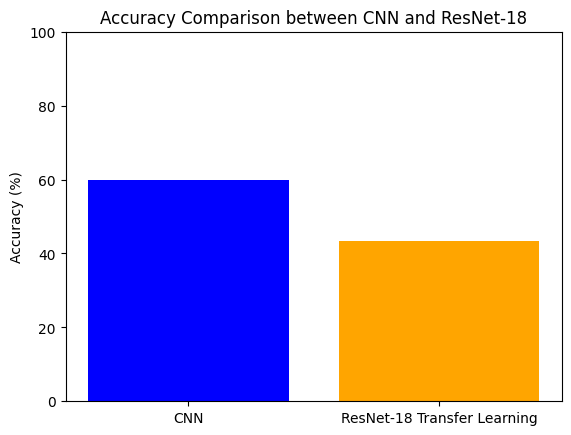

In [27]:
def get_accuracy(model, dataloader):
    corretas = 0 
    total = 0
    with torch.no_grad():
        for data in dataloader:
            imagens, labels = data  # Obtém as imagens e os rótulos do dataloader
            saidas = model(imagens)
            x, predicted = torch.max(saidas, 1)
            total += labels.size(0)
            corretas += (predicted == labels).sum().item()  # Conta o número de previsões corretas

    # Calcula a acurácia como uma porcentagem
    acuracia = (corretas / total) * 100 if total != 0 else 0  
    return acuracia  # Retorna a acurácia do modelo no conjunto de dados


# Obtendo a acurácia para ambas as redes
result_cnn = get_accuracy(custom_model, testloader)
resnet_18 = get_accuracy(resnet_model, testloader)

print(f'Acurácia da CNN: {result_cnn:.3f}%')
print(f'Acurácia da ResNet-18 com transfer learning: {resnet_18:.3f}%')

# Plotando o gráfico de barras
labels = ['CNN', 'ResNet-18 Transfer Learning']
accuracies = [result_cnn, resnet_18]

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 100)  # Define o limite do eixo y de 0 a 100 para a porcentagem de acurácia
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison between CNN and ResNet-18')
plt.show()
